
$\hspace{95mm}$ ***ΕΠ08 Αναγνώριση Προτύπων – Μηχανική Μάθηση***
$ $

$\hspace{132mm}$ ***2η Εργασία***
$ $

$\hspace{105mm}$ ***Παναγιώτα Γύφτου, Α.Μ 1115201900318***
$ $

$\hspace{130mm}$ ***Μάιος 2023*** 


#### Ερώτημα 1: Αναγνώριση Προσώπων (Face recognition)

In [1]:
# ---   ορισμός βιβλιοθηκών    ---
import os
import random 
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**I.  Διάβασμα αρχείου, ανάκτηση δεδομένων & οργάνωση υποσυνόλων με τις πληροφορίες τους**.

In [2]:
#  Ορισμός υποσυνόλων συνόλου δεδομένων Yale B
Sets = {
    'Set_1' : (1,7),
    'Set_2' : (8,19),
    'Set_3' : (20,31),
    'Set_4' : (32,45),
    'Set_5' : (46,64)
}

In [3]:
#  Βρίσκει τις εικόνες που ανήκουν στο σύνολο που έχει πεδίο (lower_lim, upper_lim) και  
#  επιστρέφει σε μια λίστα τα αρχεία εικόνων που ανήκουν στο ζητούμενο σύνολο.
def findSubset(path:str, lower_lim:int, upper_lim:int) -> list:

  Set = list()
  
  # Έλεγχος όλων των αρχείων είκονας και αποθήκευση των ζητούμενων    
  for File in os.listdir(path):
    # εύρεση του αναγνωριστικού αριθμού συνόλου
    substring = File[9:11]
    num_image = int(substring)     
    
    # εάν ο αναγνωριστικός αριθμός του τρέχοντος αρχείου εικόνας ανήκει  
    # στο ζητούμενο σύνολο -- τότε -->> το αποθηκεύουμε στην λίστα επιστροφής
    if num_image >= lower_lim and num_image <= upper_lim:
      Set.append(File)
    else: continue

  return Set

In [4]:
def loadImages(path:str, set_number:str) -> tuple :

  # εύρεση των αρχείων που ανήκουν στο ζητούμενο σύνολο και αποθήκευση αυτών στη μεταβλητή Set
  Set = findSubset(path, Sets[set_number][0], Sets[set_number][1])

  images = list()
  labels = list()
  
  # Επεξεργασία όλων των αρχείων είκονας του ζητούμενου συνόλου 
  for File in Set:    
    
    # άνοιγμα του αρχείου εικόνας  
    Fullpath = path + '/' + File
    image = Image.open(Fullpath)

    # μετατροπή εικόνας σε μορφή διανύσματος διάστασης (50 x 50 = 2500)
    image = np.resize(image,(1,50*50)).reshape(-1)
    image = image.flatten()
    images.append(image)

    # εύρεση αναγνωριστικού αριθμού εικόνας προσώπου (label)
    substring = File[6:8]
    label = int(substring)
    labels.append(label)

  return (images, labels)
    

sets, labels = loadImages('/content/drive/MyDrive/faces','Set_1')   

$ $

**II. Εφαρμογή μεθόδου Eigenfaces**

In [5]:
def Eigenfaces(path:str, d:int):
  
  # Εκπαίδευση της μεθόδου Eigenfaces  -- training -- 

  training_set, y_tr = loadImages(path, 'Set_1')    # ανάκτηση πληροφοριών συνόλου 1
  
  # χρήση της μέθοδου συμπίεσης Principal Component Analysis (PCA) για μείωση των διαστάσεων σε n_components = d
  pca = PCA(n_components = d).fit(training_set)
  X_tr_pca = pca.transform(training_set)

  # ταξινόμηση πλησιέστερου γείτονα 
  k_NearestNeighbors = KNeighborsClassifier(n_neighbors=1).fit(X_tr_pca, y_tr)
  

  # Έλεγχοσ της μεθόδου Eigenfaces  -- test --
  for set_num in Sets.keys():
    
    test_set, y_te = loadImages(path, set_num);
    X_te_pca = pca.transform(test_set)
    
    k_NearestNeighbors.predict(X_te_pca)

    print(f"Aaccuracy: {set_num} -->> {k_NearestNeighbors.score(X_te_pca,y_te)}")

  return pca.components_

In [6]:
print("---   Eigenfaces training with d = 9   ---")
l = Eigenfaces("/content/drive/MyDrive/faces", 9)

print("\n---   Eigenfaces training with d = 30   ---")
m = Eigenfaces("/content/drive/MyDrive/faces", 30)

---   Eigenfaces training with d = 9   ---
Aaccuracy: Set_1 -->> 1.0
Aaccuracy: Set_2 -->> 0.9
Aaccuracy: Set_3 -->> 0.425
Aaccuracy: Set_4 -->> 0.2
Aaccuracy: Set_5 -->> 0.14736842105263157

---   Eigenfaces training with d = 30   ---
Aaccuracy: Set_1 -->> 1.0
Aaccuracy: Set_2 -->> 0.9416666666666667
Aaccuracy: Set_3 -->> 0.5083333333333333
Aaccuracy: Set_4 -->> 0.2
Aaccuracy: Set_5 -->> 0.14736842105263157


Παρατηρούμε ότι η γενίκευση της μεθόδου για τα διάφορα d = {9,30} είναι δυνατή στα ‘Set1’ και ‘Set2’, στα υπόλοιπα υποσύνολα του συνόλου Yale B  (‘Set3’, ‘Set4’, ‘Set5’), η ακρίβεια ταξινόμησης είναι μικρή, όπου σε κάθε set ολοένα και μειώνεται, φτάνοντας στο 5ο set και για τις δύο τιμές του d , να έχει ποσοστό ακρίβειας ~10%.

$ $

**ΙΙΙ. Απεικόνιση των 9 κύριων eigenvectors**

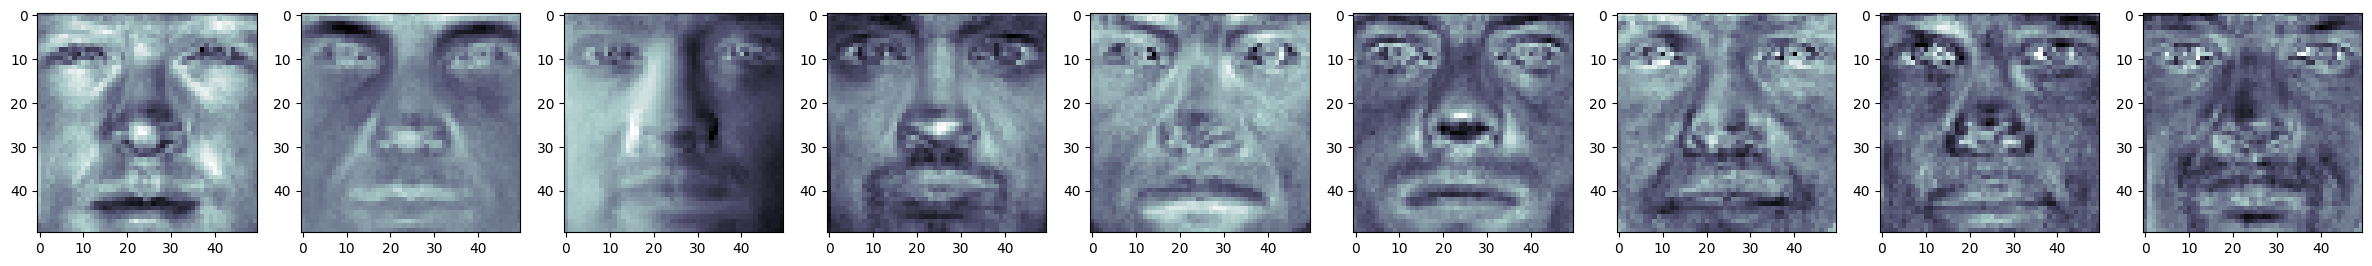

In [7]:
plt.figure(figsize=(30, 30))
for i in range(0,9):
  plt.subplot(1, 9, i+1)
  plt.imshow(l[i].reshape(50, 50), cmap='bone')

Δεν παρατηρείται μεγάλη διαφορά στις εικόνες καθώς τα ιδιοδιανύσματα στην ουσία έχουν δημιουργηθεί από τις δισδιάστατες εικόνες (50 x 50), και είναι εικόνες εκφρασμένες γραμμικά. Tα ιδιοδιανύσματα είναι μη μηδενικά διανύσματα τα οποία αναπαριστούν εικόνες προσώπων, στις οποίες έχουν αφαιρεθεί οι μη χρήσιμες πληροφορίες.

$ $

**IV. Ανακατασκευή εικόνας και οπτικοποίηση των αποτελεσμάτων πριν και μετά την επεξεργασία**

In [8]:
# ορισμός φύτρου με βάση το ΑΜ
random.seed(318)

In [9]:
def ImageReconstruction(path:str, d:int) -> tuple:
  
  # Εκπαίδευση της μεθόδου Eigenfaces  -- training --

  training_set, y_tr = loadImages(path, "Set_1")    # ανάκτηση πληροφοριών συνόλου 1
  
  # χρήση της μέθοδου συμπίεσης Principal Component Analysis (PCA) για μείωση των διαστάσεων σε n_components = d
  pca = PCA(n_components = d).fit(training_set)
  X_tr_pca = pca.transform(training_set)

  raw_images = list()
  reconstructed_images = list()

  for set_num in Sets.keys():
    
    images_set, labels = loadImages(path, set_num)
    
    # τυχαία επιλογή εικόνας
    index_image = random.randint(0, len(images_set)-1) 

    # αποθήκευση ακατέργαστης εικόνας
    raw_images.append(images_set[index_image])

    # ανακατασκυή επιλεγμένης εικόνας - reconstruction -
    X_te_pca = pca.transform(images_set)
    reconstructed_set = pca.inverse_transform(X_te_pca)
    
    # αποθήκευση ανακατασκευασμένης εικόνας
    reconstructed_images.append(reconstructed_set[index_image])

  return (raw_images, reconstructed_images)


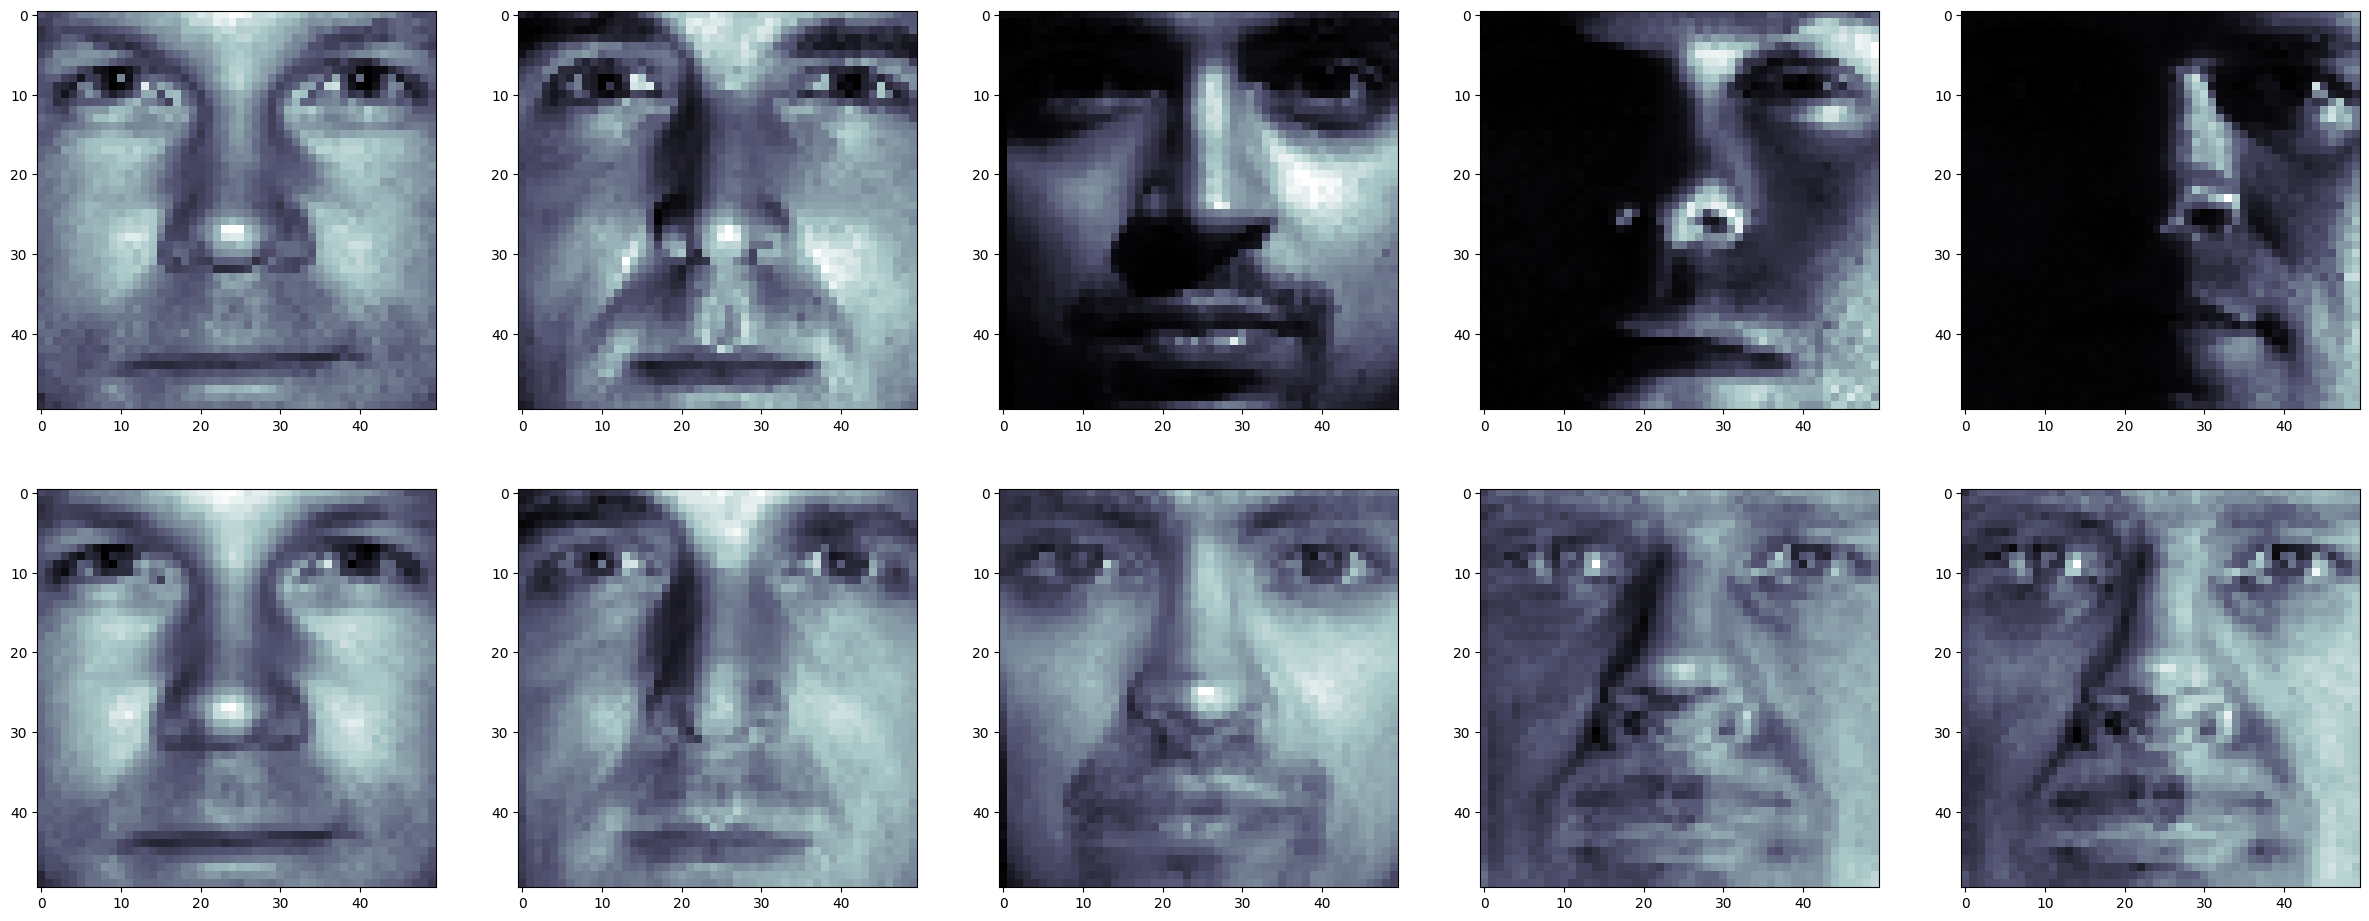

In [10]:
raw_images9, reconstructed_images9 = ImageReconstruction("/content/drive/MyDrive/faces", 9)

# -- οπτικοποίηση πριν και μετά την ανακατασκευή --
plt.figure(figsize=(30, 30))
for i in range(0, 5):
  plt.subplot(5, 5, i+1)
  # οτικοποίηση ακατέργαστης εικόνας
  plt.imshow(raw_images9[i].reshape(50, 50), cmap='bone')
  plt.subplot(5, 5, i+6)
  # οπτικοποίηση ανακατασκευασμένης εικόνας
  plt.imshow(reconstructed_images9[i].reshape(50, 50), cmap='bone')


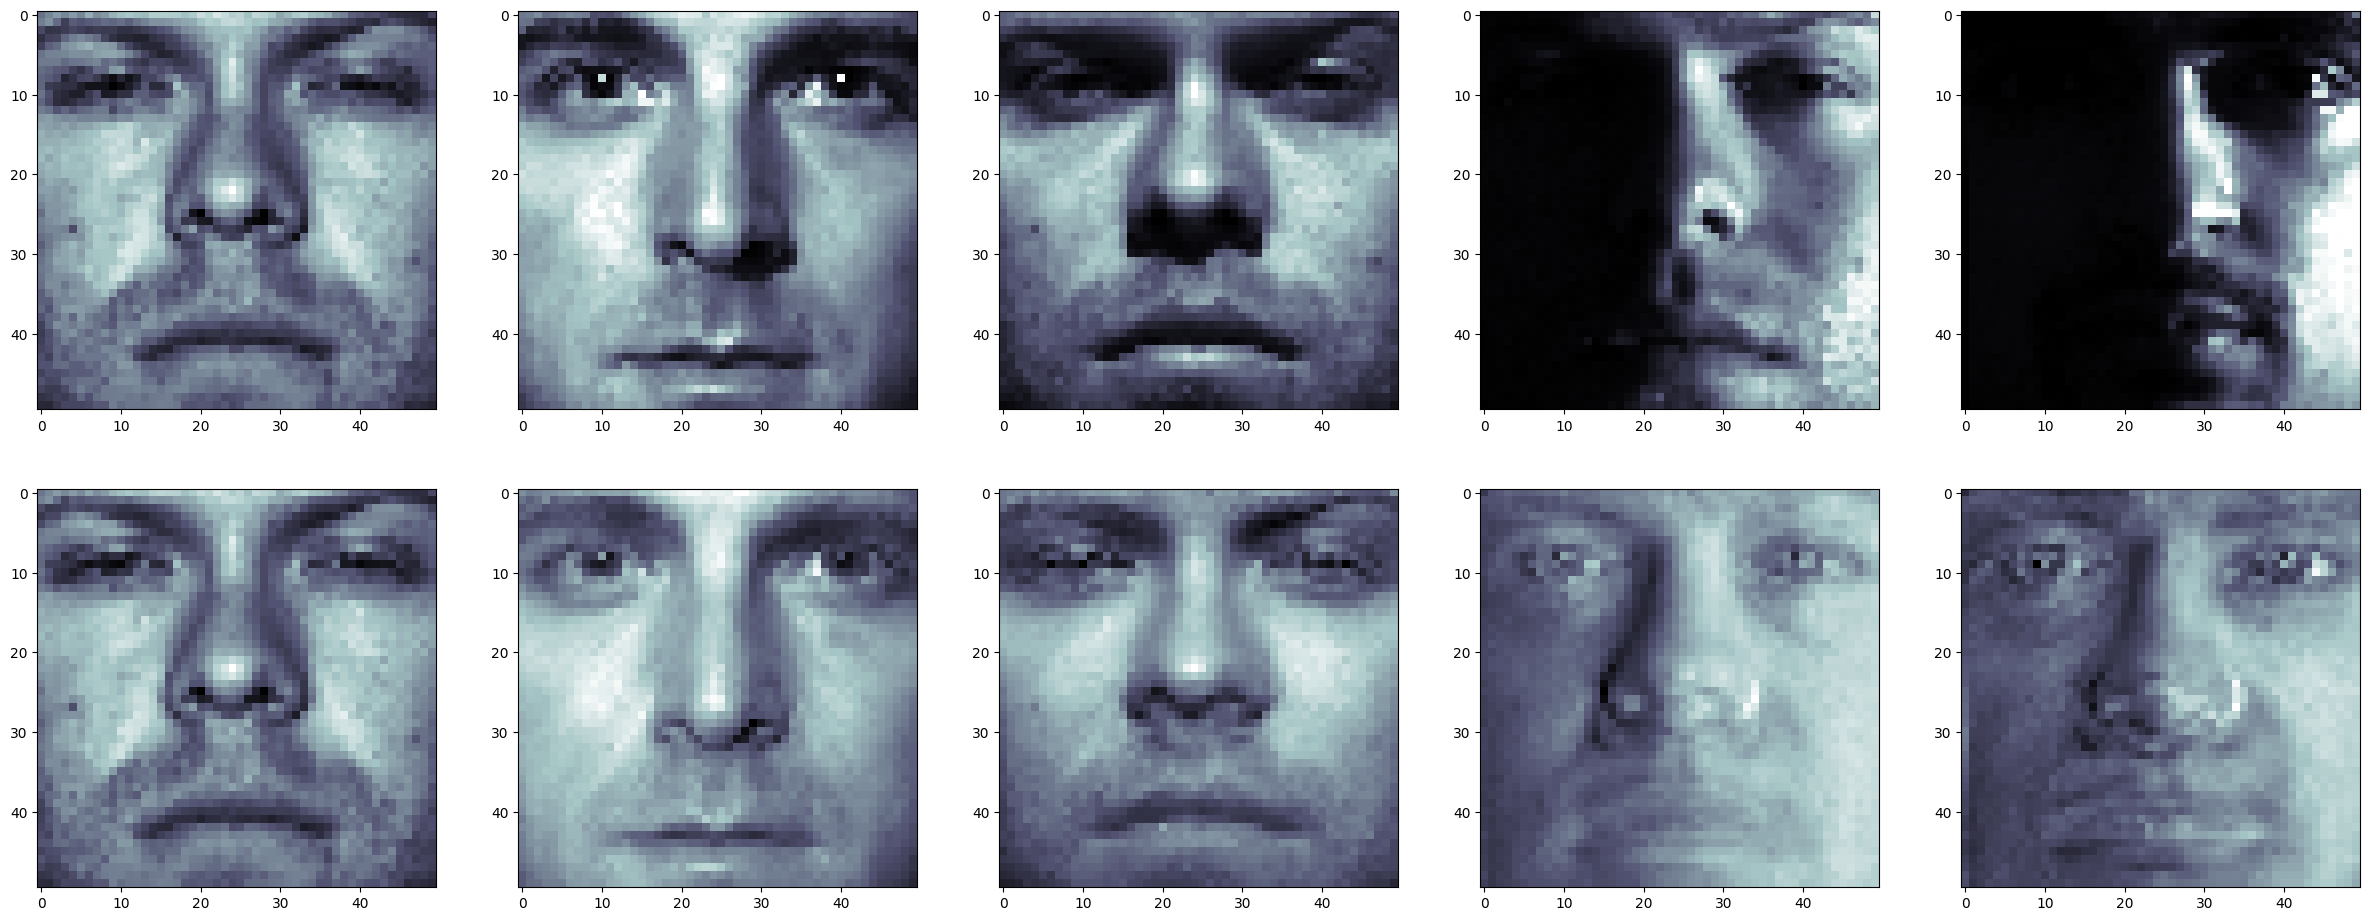

In [11]:
raw_images30, reconstructed_images30 = ImageReconstruction("/content/drive/MyDrive/faces", 30)

plt.figure(figsize=(30, 30))
for i in range(0, 5):
  plt.subplot(5, 5, i+1)
  # οτικοποίηση ακατέργαστης εικόνας
  plt.imshow(raw_images30[i].reshape(50, 50), cmap='bone')
  plt.subplot(5, 5, i+6)
  # οπτικοποίηση ανακατασκευασμένης εικόνας
  plt.imshow(reconstructed_images30[i].reshape(50, 50), cmap='bone')

Οι εικόνες μετά την ανακατασκευή είναι πιο φωτεινές και ανάλογα με τη φωτεινότητα των αρχικών είναι και πιο θολές, δηλαδή όσο πιο σκοτεινές εικόνες είναι στην αρχή τόσο πιο θολές είναι στην ανακατασκευή. Επίσης όσο πιο φωτεινή είναι πρωτότυπη εικόνα τόσο μικρότερο είναι το σφάλμα ακριβείας στην αντίστοιχη ανακατασκευασμένη εικόνα. Τέλος παρατηρούμε ότι οι ανακατασκευασμένες εικόνες με d=9  είναι λιγότερο θολές σε σχέση με τις ανακατασκευασμένες εικόνες με d = 30.

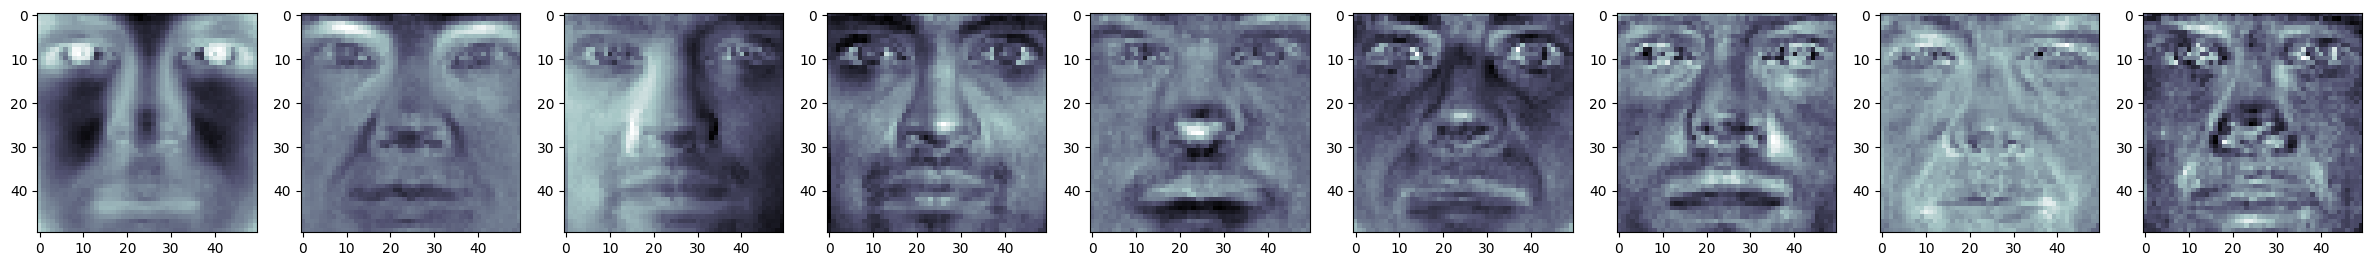

In [12]:
images_set, labels = loadImages("/content/drive/MyDrive/faces", "Set_1")
U, S, VT = np.linalg.svd(images_set)

plt.figure(figsize=(30, 30))
for i in range(0, 9):
  plt.subplot(1, 9, i+1)
  plt.imshow(VT[i].reshape(50, 50), cmap='bone')
plt.show()

Τα singular vectors διαφέρουν από τα αντίστοιχα ιδιοδιανύσματα για τον εξής λόγο: \\
Έστω ο πίνακας (SVD)
$$ \Pi = U \cdot S \cdot V^{T} $$ \\
Όπου τα singular values του πίνακα Π είναι οι τετραγωνικές ρίζες των ιδιοδιανυσμάτων του πίνακα $\Pi^{T}\Pi$. 
Για να επιτευχθεί η ομοιότητα των εικόνων που έχουν παραχθεί με την μέθοδο Eigenfaces και από την μέθοδο διάσπασης μοναδιαίων τιμών (SVD) πρέπει ο πίνακα Π να είναι συμμετρικός δηλαδή να ισχύει 
$$ \Pi = \Pi^{T}$$ 


Στην συγκεκριμένη περίπτωση ο πίνακας Π δεν είναι συμμετρικός και γι' αυτό δεν έχουμε τις ίδιες εικόνες.

#### Ερώτημα 2: Ταξινόμηση εικόνων χρησιμοποιώντας SVMs

> Γενικά η μηχανή διανυσμάτων υποστήριξης (Support Vector Machines SVM) είναι ένα μοντέλο κατηγοριοποίησης, όπου εκπαιδεύει είτε γραμμικά, είτε μη γραμμικά μοντέλα.Η SVM έχει τη μοναδικότητα να προσαρμόζεται αποτελεσματικά χωρίς προβλήματα, καθώς ισορροπεί τα σφάλματα εκπαίδευσης με την πολυπλοκότητα του μοντέλου αλλά και την διαχείριση μη χρήσιμων χαρακτηριστικών. Σε αυτή την άσκηση εφαρμόζεται για την αναγνώριση ψηφίων γραμμένων στο χέρι.



In [13]:
# ---   ορισμός βιβλιοθηκών    ---
import time
import numpy as np

from sklearn.svm import SVC
from keras.datasets import mnist
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

$ $

**1o bullet**

In [14]:
# Ανάκτηση δεδομένων, διαχωρισμός και αποθήκευση δεδομένων MNIST 
(X_training, y_training), (X_test, y_test) = mnist.load_data()

In [15]:
# Μετατροπή εικόνων σε μορφή διανύσματος διάστασης (28 x 28 = 784)
def convert_images_to_vecform(X: list, numofimages: int) -> list:
  
  Digits_X = list()
  for i in range(numofimages):
        image = np.resize(X[i],(1, 28*28)).reshape(-1)
        image = image.flatten()
        Digits_X.append(image)

  return Digits_X

In [16]:
# Κανονικοποίηση δεδομένων στο διάστημα [0,1]
def normalizeData(Digits_X: list) -> np.ndarray: 
  scaler = StandardScaler()
  scaled_features = scaler.fit_transform(Digits_X)

  return scaled_features


In [17]:
# Μετατροπή εικόνων σε μορφή διανύσματος & κανονικοποίηση δεδομένων

# 1. Στοιχεία εκπαίδευσης
DigitsTrain_X = convert_images_to_vecform(X_training, X_training.shape[0])
X_train_scaled_features = normalizeData(DigitsTrain_X) 

# 2. Στοιχεία ελέγχου
DigitsTest_X = convert_images_to_vecform(X_test, X_test.shape[0])
X_test_scaled_features = normalizeData(DigitsTest_X) 

$ $

**2o bullet** 

 **Προσοχή!!** οι χρόνοι των πειραματικών ελέγχων έχουν μικρή απόκλιση σε κάθε εκτέλεση!

 $\ \ \bullet \ \  $ Γραμμική Μηχανή Διανυσμάτων Υποστήριξης 

In [18]:
# Γραμμική Μηχανή Διανυσμάτων Υποστήριξης
start = time.time()

linearSVMs = SVC(kernel='linear', C = 0.1, gamma = 0.0001)
linearSVMs.fit(X_train_scaled_features, y_training)

end = time.time()

total_training_time = end - start
print(f'The total training time of linear SupportVectorMachine is: {total_training_time} s')
print(f'Accuracy Linear: {linearSVMs.score(X_test_scaled_features, y_test)}')


The total training time of linear SupportVectorMachine is: 276.20205426216125 s
Accuracy Linear: 0.9376


Από τους πειραματικούς ελέγχους που έγιναν, εξήχθησαν οι εξής παράμετροι που παράγουν καλές επιδόσεις για το γραμμικό μοντέλο 
1. C = 0.1  $\ \ $ gamma =  0.01
2. C = 0.1  $\ \ $ gamma =  0.001
3. C = 0.1  $\ \ $ gamma =  0.0001 
$ $

Έχουν γίνει οι εξής πειραματικοί έλεγχοι των παραμέτρων για την εύρεση των βέλτιστων επιδόσεων του ***γραμμικού μοντέλου (linear)***:
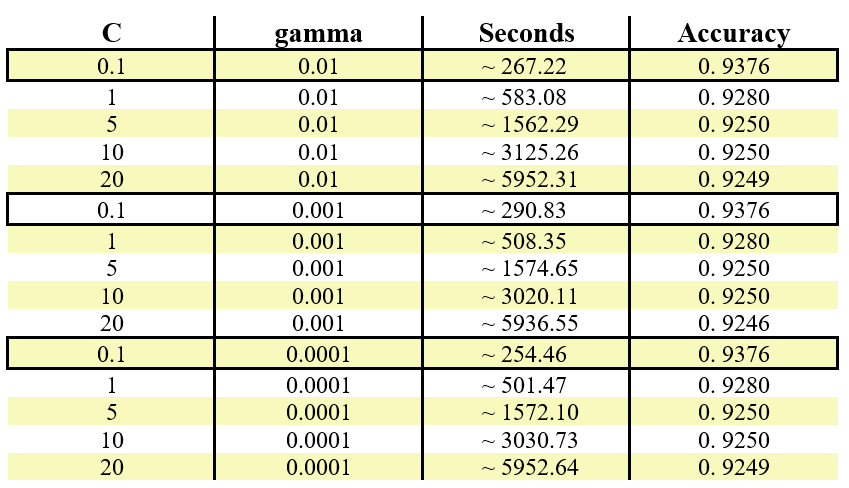

$ $

$\ \ \bullet \ \  $ Μη Γραμμική Μηχανή Διανυσμάτων Υποστήριξης

In [19]:
# Μη Γραμμική Μηχανή Διανυσμάτων Υποστήριξης
start = time.time()

RBFSVMs = SVC(kernel='rbf', C = 10, gamma = 0.001)
RBFSVMs.fit(X_train_scaled_features, y_training)

end = time.time()

total_training_time = end - start
print(f'The total training time of rbf SupportVectorMachine is: {total_training_time} s')
print(f'Accuracy RBF: {RBFSVMs.score(X_test_scaled_features, y_test)}')

The total training time of rbf SupportVectorMachine is: 345.12565088272095 s
Accuracy RBF: 0.9724


Από τους πειραματικούς ελέγχους που έγιναν, εξήχθησαν οι εξής παράμετροι που παράγουν καλές επιδόσεις για το γραμμικό μοντέλο 
1. C = 10  $\ \ $ gamma =  0.001


Έχουν γίνει οι εξής πειραματικοί έλεγχοι των παραμέτρων για την εύρεση των βέλτιστων επιδόσεων του ***μη γραμμικού μοντέλου (rbf)***

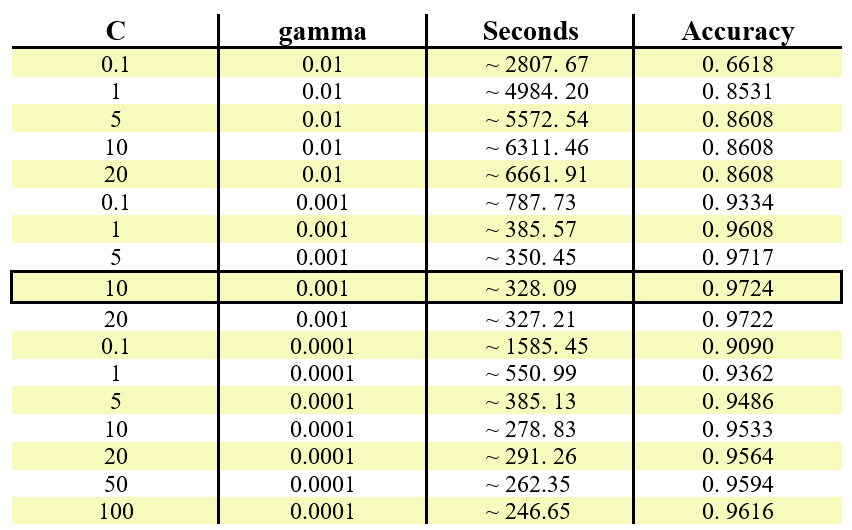

$ $

$ $

> **--- $ \ \ \  $Παράμετροι που οδήγησαν στις καλύτερες επιδόσεις $ \ \ \  $ ---**


*   **C** = 10
*   **gamma** =  0.001 
*   **kernel** = 'rbf'

$ \ \  \ \ \ \ $***Accuracy = 0.9724***


$ $

**3o bullet**

In [20]:
for n in [0.7, 0.8, 0.9]:
  
  # Χρήση της μέθοδου συμπίεσης Principal Component Analysis (PCA) για μείωση των διαστάσεων σε n_components= {0.7, 0.8, 0.9}
  pca = PCA(n_components = n)

  X_train_pca = pca.fit_transform(X_train_scaled_features)
  X_test_pca = pca.transform(X_test_scaled_features)

  start = time.time()

  RBFSVMs = SVC(kernel='rbf', C = 10, gamma = 0.001)
  RBFSVMs.fit(X_train_pca, y_training)

  print(f'Accuracy RBF: {RBFSVMs.score(X_test_pca, y_test)}')
  print(f'Number of components: {pca.n_components_}')

  end = time.time()

  total_training_time = end - start
  print(f'The total time of rbf SupportVectorMachine is: {total_training_time} s')

Accuracy RBF: 0.9772
Number of components: 98
The total time of rbf SupportVectorMachine is: 53.48183012008667 s
Accuracy RBF: 0.9757
Number of components: 149
The total time of rbf SupportVectorMachine is: 90.76213145256042 s
Accuracy RBF: 0.9743
Number of components: 236
The total time of rbf SupportVectorMachine is: 157.68856048583984 s


Το σύνολο δεδομένων MNIST έχει χιλιάδες στοιχεία στη βάση του, με τη μείωση των διαστάσεων μέσω της τεχνικής PCA (ανάλυση κυρίων συνιστωσών), το πλήθος των στοιχείων και ο θόρυβος μειώνονται. Αυτή η μείωση βοήθησε αρκετά στην αποδοτική λειτουργία του μη γραμμικού SVM, όπου φαίνεται από τη μείωση του χρόνου εκτελέσης καθώς και από την αύξηση ακρίβειας της ταξινόμησης σε σχέση με τη μη συμπίκνωση του συνόλου δεδομένων. Πιο συγκεκριμένα παρατηρούμε ότι για 

$ $


*   70%  διατηρούμενης  διακύμανσης, η επίδοση είναι 0.9772
*   80%  διατηρούμενης  διακύμανσης, η επίδοση είναι 0.9757
*   90%  διατηρούμενης  διακύμανσης, η επίδοση είναι 0.9743

$ $

Τέλος παρατηρούμε, ότι με την αύξηση του πλήθους των συνιστωσών αυξάνεται σταδιακά ο χρόνος εκτέλεσης και μειώνεται η ακρίβεια ταξινόμησης, καθώς όσο περισσότερες διαστάσεις έχουμε τόσο μαγαλύτερο είναι και το πλήθος των στοιχείων του συνόλου δεδομένων όπου πρέπει να εξεταστούν.
